# Figures from OHBM 2020 presentation

For any slide with an * at the top right, the code to generate the multilayer network on that slide is below.

In [1]:
## Import packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import multinetx as mx
import scipy.io as sio
import pandas as pd
import os
import sys
import mx_viz

print("Done importing packages :)")

finished defining functions
Done importing packages :)


## Two aspects, two layers

Aspect L1: nodes as usual
Aspect L2: "A" or "B"

In [2]:
# Set filename
filename = "data/mx_2layers2.json"

# Define number of nodes (number of nodes in largest layer)
nNodes = 10

# Define number of levels
nLayers = 2

# Use multinetx to generate two graphs each on nNodes nodes
g1 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=216)
g2 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=130)

# Define adjacency between layers. Here we only assign nodes to themselves in each layer.
adj_block = mx.lil_matrix(np.zeros((nNodes*3,nNodes*3)))
adj_block[0:  nNodes,  nNodes:2*nNodes] = np.identity(nNodes)    # L_12
adj_block += adj_block.T

# Create multilayer graph with mx
mg = mx.MultilayerGraph(list_of_layers=[g1,g2],
                        inter_adjacency_matrix=adj_block)

# Here we can set the edge weights to different values just so we can see which are inter- and intra-layer edges
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)


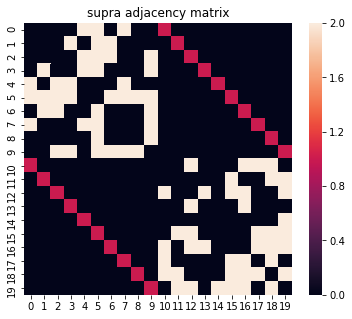

In [3]:
## Plot the supra-adjacency matrix
fig = plt.figure(figsize=(6,5))
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
plt.title('supra adjacency matrix');


In [4]:
# Write to json file

# We'll use networkx positioning to get nice layouts. We create a layout using a layer that contains all nNodes nodes.
# In this case both layers are the same size so it doesn't matter :)

# Feel free to change the layout used here. It will be reflected in the d3 plot. However pos is changed, it should
# remain a dictionary mapping nodes to coordinate arrays with at least an x and y position.
pos = nx.layout.fruchterman_reingold_layout(g1, dim=3, k=2)

G2 = mx_viz.write_mx_to_json(filename,mg, nNodes, pos, nLayers)
mx_viz.visualize(G2,theme="dark",path_html="visualization_output_example.html")


done writing mx to data/mx_2layers2.json
Wrote visualization to: visualization_output_example.html


'<!DOCTYPE html>\n<meta charset="utf-8">\n\n<head>\n    <title>MX viz</title>\n    <style>    #header {\n      margin: auto;\n      margin-top: 30px;\n      width: 95%;\n      height: 40px;\n      padding: 10px;\n      overflow: auto;\n      background: rgba(255,255,255,0.06);\n    \n    }\n    \n    h2 {\n      color: white;\n      font-family: "Helvetica Neue", Helvetica, sans-serif;\n      margin-top: 5px;\n      margin-bottom: 30px;\n      font-weight: lighter;\n    }\n    \n    #header h1 {\n      margin: auto;\n      opacity: 1;\n      color: white;\n      font-family: "Helvetica Neue", Helvetica, sans-serif;\n      font-weight: 300;\n      padding-left: 20px;\n    \n    }\n    \n    #svgdiv-mx {\n      margin: auto;\n      padding: 0px 30px;\n    }\n    \n    #svg-mx {\n      margin: 0 auto;\n      isolation: isolate;\n    }\n    \n    #svg-sadj {\n      margin: 0 auto;\n    }\n    \n    #footer {\n      position: fixed;\n      left: 0;\n      bottom: 0;\n      margin: auto;\n  

## Ex 2: 2 aspects, 5 layers


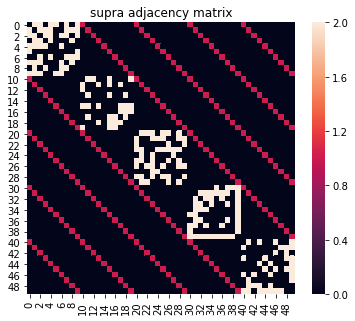

In [5]:
# Set filename
filename = "data/mx_5layers.json"

# Define number of nodes (number of nodes in largest layer)
nNodes = 10

# Define number of levels
nLayers = 5

# Use multinetx to generate two graphs each on nNodes nodes
g1 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=218)
g2 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=132)
g3 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=192)
g4 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=19)
g5 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=102)

# Define adjacency between layers. Here we only assign nodes to themselves in each layer.
adj_block = mx.lil_matrix(np.zeros((nNodes*nLayers,nNodes*nLayers)))

for i in np.arange(nLayers-1):
    for l in np.arange(i+1,nLayers):
        adj_block[i*nNodes:(i+1)*nNodes, (l)*nNodes:(l+1)*nNodes] = np.identity(nNodes)   

adj_block += adj_block.T

# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3,g4,g5],
                        inter_adjacency_matrix=adj_block)

# Set edge weights
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)

## Plot the supra-adjacency matrix
fig = plt.figure(figsize=(6,5))
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
plt.title('supra adjacency matrix');



In [7]:
# Write to json file

# We'll use networkx positioning to get nice layouts. We create a layout using a layer that contains all nNodes nodes.
# In this case both layers are the same size so it doesn't matter :)
# Feel free to change the layout used here. It will be reflected in the d3 plot.
pos = nx.layout.fruchterman_reingold_layout(g1, dim=3)

# write to json file
# write_mx_to_json(filename, mx, nNodes, pos, nLayers)
G2 = mx_viz.write_mx_to_json(filename,mg, nNodes, pos, nLayers)
mx_viz.visualize(G2)


done writing mx to data/mx_5layers.json
Wrote visualization to: visualization_output.html


'<!DOCTYPE html>\n<meta charset="utf-8">\n\n<head>\n    <title>MX viz</title>\n    <style>    #header {\n      margin: auto;\n      margin-top: 30px;\n      width: 95%;\n      height: 40px;\n      padding: 10px;\n      overflow: auto;\n      background: rgba(255,255,255,0.06);\n    \n    }\n    \n    h2 {\n      color: white;\n      font-family: "Helvetica Neue", Helvetica, sans-serif;\n      margin-top: 5px;\n      margin-bottom: 30px;\n      font-weight: lighter;\n    }\n    \n    #header h1 {\n      margin: auto;\n      opacity: 1;\n      color: white;\n      font-family: "Helvetica Neue", Helvetica, sans-serif;\n      font-weight: 300;\n      padding-left: 20px;\n    \n    }\n    \n    #svgdiv-mx {\n      margin: auto;\n      padding: 0px 30px;\n    }\n    \n    #svg-mx {\n      margin: 0 auto;\n      isolation: isolate;\n    }\n    \n    #svg-sadj {\n      margin: 0 auto;\n    }\n    \n    #footer {\n      position: fixed;\n      left: 0;\n      bottom: 0;\n      margin: auto;\n  

## Time series example

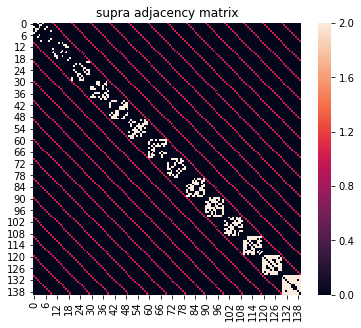

In [8]:
# Set filename
filename = "data/mx_timeseries.json"

# Define number of nodes (number of nodes in largest layer)
nNodes = 10

# Define number of levels
nLayers = 14

# Use multinetx to generate fourteen graphs each on nNodes nodes
graph_layers = [mx.generators.erdos_renyi_graph(nNodes,((i+3)/(nLayers+5)),seed=np.random.randint(1,300)) for i in np.arange(nLayers)]


# Define adjacency between layers. Here we only assign nodes to themselves in each layer.
adj_block = mx.lil_matrix(np.zeros((nNodes*nLayers,nNodes*nLayers)))

for i in np.arange(nLayers-1):
    for l in np.arange(i+1,nLayers):
        adj_block[i*nNodes:(i+1)*nNodes, (l)*nNodes:(l+1)*nNodes] = np.identity(nNodes)   

adj_block += adj_block.T

# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=graph_layers,
                        inter_adjacency_matrix=adj_block)

# Set edge weights
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)

## Plot the supra-adjacency matrix
fig = plt.figure(figsize=(6,5))
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
plt.title('supra adjacency matrix');

In [10]:
# Write to json file

# We'll use networkx positioning to get nice layouts. We create a layout using a layer that contains all nNodes nodes.
# In this case both layers are the same size so it doesn't matter :)
# Feel free to change the layout used here. It will be reflected in the d3 plot.
pos = nx.layout.fruchterman_reingold_layout(g1, dim=3)

# write to json file
# write_mx_to_json(filename, mx, nNodes, pos, nLayers)


G2 = mx_viz.write_mx_to_json(filename,mg, nNodes, pos, nLayers)
mx_viz.visualize_timeseries(G2, path_html="visualization_output_timeseries_example.html")

done writing mx to data/mx_timeseries.json
./javascript/mx_viz_timeseries.js
Wrote visualization to: visualization_output_timeseries_example.html


'<!DOCTYPE html>\n<meta charset="utf-8">\n\n<head>\n  <title>MX viz</title>\n  <style>#header {\n    margin: auto;\n    margin-top: 30px;\n    margin-bottom: 20px;\n    width: 95%;\n    height: 40px;\n    padding: 10px;\n    overflow: auto;\n    background: rgba(255,255,255,0.06);\n  \n    }\n  \n    #header h1 {\n      margin: auto;\n      opacity: 1;\n      color: white;\n      font-family: "Helvetica Neue", Helvetica, sans-serif;\n      font-weight: 300;\n      padding-left: 20px;\n  \n    }\n  \n    h2 {\n      color: white;\n      font-family: "Helvetica Neue", Helvetica, sans-serif;\n      margin-top: 5px;\n      margin-bottom: 30px;\n      font-weight: lighter;\n    }\n  \n    #svgdiv-mx {\n      /* float: left; */\n      margin: 10px 20px 10px 20px;\n      color: white;\n      isolation: isolate;\n  \n    }\n  \n    #svg-mx {\n      align-items: center;\n      margin: auto;\n      position: relative;\n      display: block;\n    }\n  \n    #options-div {\n      margin: auto;\n  

## Non-identity inter-layer connections

In [ ]:
# Set filename
filename = "data/mx_nonidentity.json"

# Define number of nodes (number of nodes in largest layer)
nNodes = 10

# Define number of levels
nLayers = 4

# Use multinetx to generate graphs each on nNodes nodes
graph_layers = [mx.generators.erdos_renyi_graph(nNodes,0.5,seed=np.random.randint(1,300)) for i in np.arange(nLayers)]


# Define adjacency between layers. Now we randomly connect nodes in separate layers.
adj_block = mx.lil_matrix(np.zeros((nNodes*nLayers,nNodes*nLayers)))

for i in np.arange(nLayers-1):
    for l in np.arange(i+1,nLayers):
        adj_block[i*nNodes:(i+1)*nNodes, (l)*nNodes:(l+1)*nNodes] = np.random.choice([0,1],size=(nNodes,nNodes),replace=True,p=[0.9,0.1])   # L_1*

adj_block += adj_block.T

# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=graph_layers,
                        inter_adjacency_matrix=adj_block)

# Set edge weights
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)

## Plot the supra-adjacency matrix
fig = plt.figure(figsize=(6,5))
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
plt.title('supra adjacency matrix');



In [ ]:
# Write to json file

# We'll use networkx positioning to get nice layouts. We create a layout using a layer that contains all nNodes nodes.
# In this case both layers are the same size so it doesn't matter :)
# Feel free to change the layout used here. It will be reflected in the d3 plot.
pos = nx.layout.fruchterman_reingold_layout(g1, dim=3)

# write to json file
write_mx_to_json(filename, mg, nNodes, pos, nLayers)

## Case where nodes are not in every layer

In [ ]:
# When we do not have all nNodes in each layer, we will proceed as before but then delete nodes towards the end

# Set filename
filename = "data/mx_missingnodes.json"

# Define number of nodes (number of nodes in largest layer)
nNodes = 10

# Define number of levels
nLayers = 3

# Set which nodes should not exist in the final graph
nodes_to_remove = [11, 17, 21, 25, 28]

# Use multinetx to generate two graphs each on nNodes nodes
g1 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=102)
g2 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=54)
g3 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=194)


# Define adjacency between layers. Here we only assign nodes to themselves in each layer.
adj_block = mx.lil_matrix(np.zeros((nNodes*nLayers,nNodes*nLayers)))

for i in np.arange(nLayers-1):
    for l in np.arange(i+1,nLayers):
        adj_block[i*nNodes:(i+1)*nNodes, (l)*nNodes:(l+1)*nNodes] = np.identity(nNodes)   

adj_block += adj_block.T

# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3],
                        inter_adjacency_matrix=adj_block)

# Set edge weights
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)

## Plot the supra-adjacency matrix
fig = plt.figure(figsize=(6,5))
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
plt.title('supra adjacency matrix (before removing nodes)');



In [ ]:
# Since nodes don't exist in every layer, it might be easier to visualize with a circular layout...
pos = nx.circular_layout(g1)

# Write to json -- make sure to add nodes_to_remove
write_mx_to_json(filename, mg, nNodes, pos, nLayers, nodes_to_remove)

## Motifs example

In [ ]:
# Set filename
filename = "data/mx_motifs.json"

# Define number of nodes (number of nodes in largest layer)
nNodes = 7

# Define number of levels
nLayers = 2

# Use multinetx to generate two graphs each on nNodes nodes
g1 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=218)
g2 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=132)

# Define adjacency between layers. Here we only assign nodes to themselves in each layer.
adj_block = mx.lil_matrix(np.zeros((nNodes*3,nNodes*3)))
adj_block[0:  nNodes,  nNodes:2*nNodes] = np.identity(nNodes)    # L_12
adj_block += adj_block.T

# Create multilayer graph with mx
mg = mx.MultilayerGraph(list_of_layers=[g1,g2],
                        inter_adjacency_matrix=adj_block)

# Here we can set the edge weights to different values just so we can see which are inter- and intra-layer edges
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)


In [ ]:
## Plot the supra-adjacency matrix
fig = plt.figure(figsize=(6,5))
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
plt.title('supra adjacency matrix');

In [ ]:
# Write to json file

# See previous cells for descriptions
pos = nx.layout.fruchterman_reingold_layout(g1, dim=3, k=1)

write_mx_to_json(filename,mx, nNodes, pos, nLayers)

## Centrality example

In [ ]:
# Set filename
filename = "data/mx_centrality.json"

# Define number of nodes (number of nodes in largest layer)
nNodes = 5

# Define number of levels
nLayers = 3

# Use multinetx to generate two graphs each on nNodes nodes
g1 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=13)
g2 = mx.generators.barabasi_albert_graph(nNodes,1,seed=48)
g3 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=72)

# Define adjacency between layers. Here we only assign nodes to themselves in each layer.
adj_block = mx.lil_matrix(np.zeros((nNodes*nLayers,nNodes*nLayers)))

for i in np.arange(nLayers-1):
    for l in np.arange(i+1,nLayers):
        adj_block[i*nNodes:(i+1)*nNodes, (l)*nNodes:(l+1)*nNodes] = np.identity(nNodes)   

adj_block += adj_block.T

# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3],
                        inter_adjacency_matrix=adj_block)

# Set edge weights
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)

## Plot the supra-adjacency matrix
fig = plt.figure(figsize=(6,5))
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
plt.title('supra adjacency matrix');


In [ ]:
# Write to json file

# See previous cells for details.
pos = nx.circular_layout(g1)

# write to json file
write_mx_to_json(filename, mx, nNodes, pos, nLayers)

## Communities example

In [ ]:
# Set filename
filename = "data/mx_communities.json"

# Define number of nodes (number of nodes in largest layer)
nNodes = 20

# Define number of levels
nLayers = 3

# Use multinetx to generate two graphs each on nNodes nodes
g1 = mx.generators.powerlaw_cluster_graph(nNodes,2,0.7,seed=48)
g2 = mx.generators.powerlaw_cluster_graph(nNodes,2,0.9,seed=68)
g3 = mx.generators.erdos_renyi_graph(nNodes,0.1,seed=72)


# Define adjacency between layers. Here we only assign nodes to themselves in each layer.
adj_block = mx.lil_matrix(np.zeros((nNodes*nLayers,nNodes*nLayers)))

for i in np.arange(nLayers-1):
    for l in np.arange(i+1,nLayers):
        adj_block[i*nNodes:(i+1)*nNodes, (l)*nNodes:(l+1)*nNodes] = np.identity(nNodes)   

adj_block += adj_block.T

# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3],
                        inter_adjacency_matrix=adj_block)

# Set edge weights
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)

## Plot the supra-adjacency matrix
fig = plt.figure(figsize=(6,5))
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
plt.title('supra adjacency matrix');


In [ ]:
# Write to json file

# See previous cells for details.
pos = nx.layout.fruchterman_reingold_layout(g1, dim=3, k=1)

# write to json file
write_mx_to_json(filename, mx, nNodes, pos, nLayers)